![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [62]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [63]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [64]:
penguins_df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [65]:
penguins_df.sex = penguins_df.sex.map({
    'MALE': 1,
    'FEMALE': 0
})

In [66]:
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_preprocessed = pd.DataFrame(data=X,columns=penguins_df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994
5,-0.940642,0.330548,-1.425342,-0.722199,-1.006042
6,-0.885538,1.250172,-0.426399,0.581912,0.993994
7,-0.536545,0.228367,-1.353989,-1.250054,-1.006042
8,-0.995746,2.067616,-0.711811,-0.504847,0.993994
9,-1.363106,0.330548,-1.139930,-0.629049,-1.006042


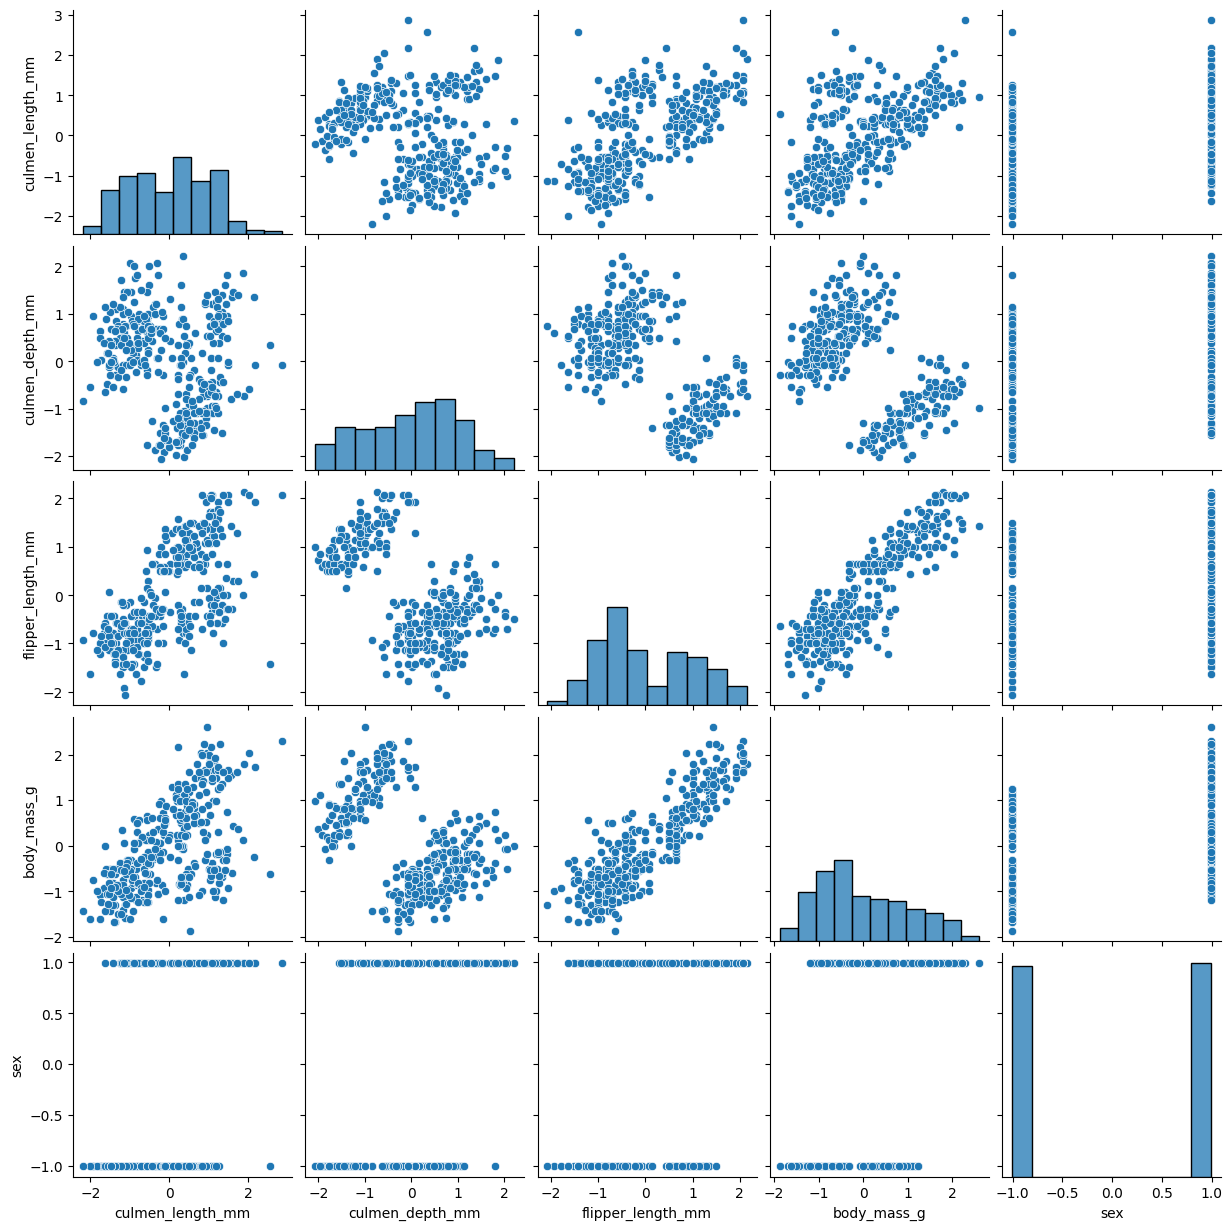

In [67]:
sns.pairplot(penguins_preprocessed)

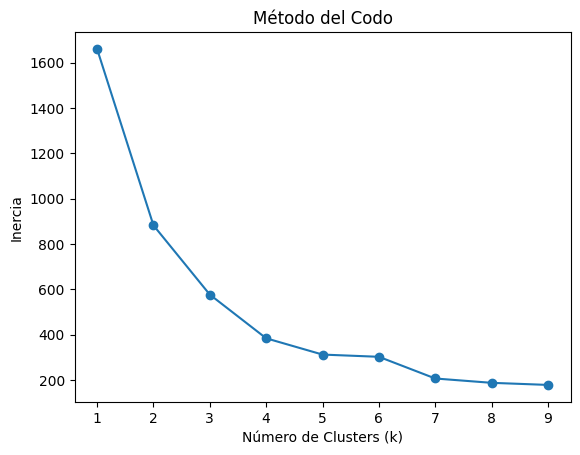

In [68]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_preprocessed)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(penguins_preprocessed)
penguins_df['label'] = kmeans.labels_
penguins_df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,1,0
1,39.5,17.4,186.0,3800.0,0,2
2,40.3,18.0,195.0,3250.0,0,2
3,36.7,19.3,193.0,3450.0,0,2
4,39.3,20.6,190.0,3650.0,1,0
5,38.9,17.8,181.0,3625.0,0,2
6,39.2,19.6,195.0,4675.0,1,0
7,41.1,17.6,182.0,3200.0,0,2
8,38.6,21.2,191.0,3800.0,1,0
9,36.6,17.8,185.0,3700.0,0,2


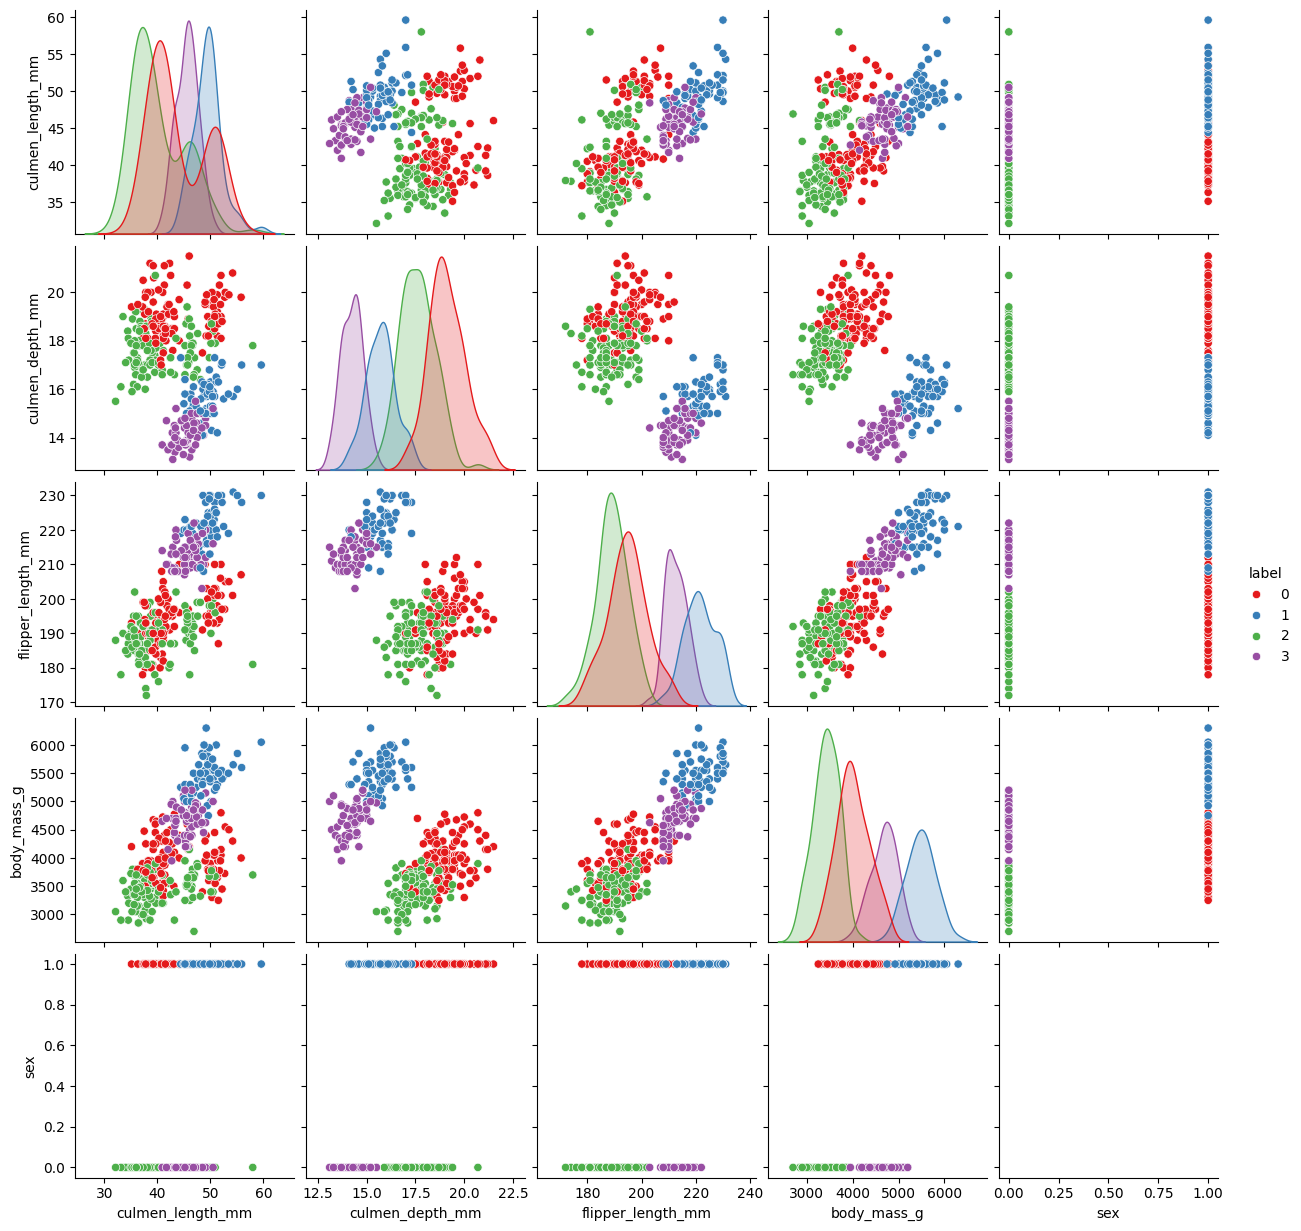

In [70]:
sns.pairplot(penguins_df,hue='label', palette='Set1', diag_kind='kde')

In [71]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,49.473770,15.718033,221.540984
2,40.217757,17.611215,189.046729
3,45.563793,14.237931,212.706897


In [72]:
stat_penguins.sample(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
1,49.473770,15.718033,221.540984
2,40.217757,17.611215,189.046729
0,43.878302,19.111321,194.764151
